In [ ]:
#importing necessary libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for mathematical functions
pd.set_option('display.max_columns',None) # to display all the columns
import seaborn as sns #for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [3]:
#reading the dataset
df = pd.read_csv('imdb_1.csv')
df

,startYear,runtimeMinutes,titleType,canHaveEpisodes,numRegions,ratingCount,castNumber,companiesNumber,averageRating,writerCredits,directorsCredits,totalNominations,totalMedia,totalReviews,Asia,Africa,Europe,North America,South America,Australia,Continent Unknown,genre1,genre2,genre3
0,1894,1,short,0,7,2092,1,3,5.7,0,1,0,11,19,1,0,5,1,0,0,0,16581,16787,0
1,1892,12,short,0,6,183,0,0,5.4,0,1,0,5,1,1,0,5,0,0,0,0,17855,16787,0
2,1894,1,short,0,5,195,0,1,5.0,0,1,0,5,0,0,0,4,1,0,0,0,16787,0,0
3,1894,1,short,0,6,2238,1,6,5.4,0,1,1,9,22,1,0,4,1,0,0,0,16581,16787,0
4,1896,1,short,0,21,13115,6,5,7.4,0,2,0,33,82,2,0,14,2,1,0,2,16581,16787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,1993,96,movie,0,1,11,0,2,7.0,1,1,0,1,0,0,0,0,0,1,0,0,16581,0,0
149527,2019,14,short,0,1,15,6,3,6.4,1,1,3,10,1,0,0,1,0,0,0,0,51745,16787,0
149528,2019,35,tvEpisode,0,0,12,1,0,5.6,0,0,0,5,0,0,0,0,0,0,0,0,5726,0,0
149529,2011,10,tvEpisode,0,0,10,7,0,7.1,3,1,0,1,0,0,0,0,0,0,0,0,17763,17855,47408


In [5]:
#Scaling the data
standardized_data = StandardScaler().fit_transform(df.drop(columns = ['titleType'], axis = 1))
print(standardized_data.shape)

(149531, 23)


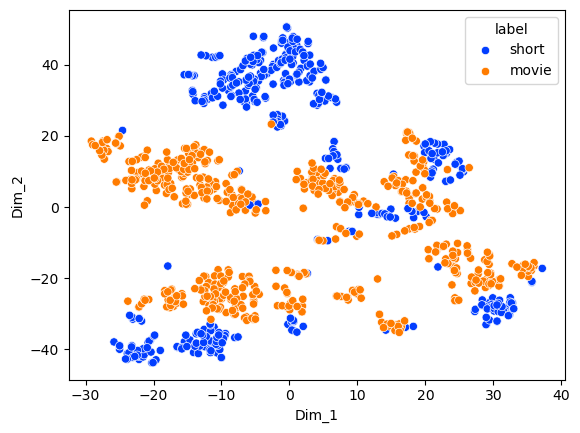

In [7]:
#just checking t-SNE

data_1000 = standardized_data[0:1000, :]
labels_1000 = df['titleType'][0:1000]

model = TSNE(n_components = 2, random_state = 0)

tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()

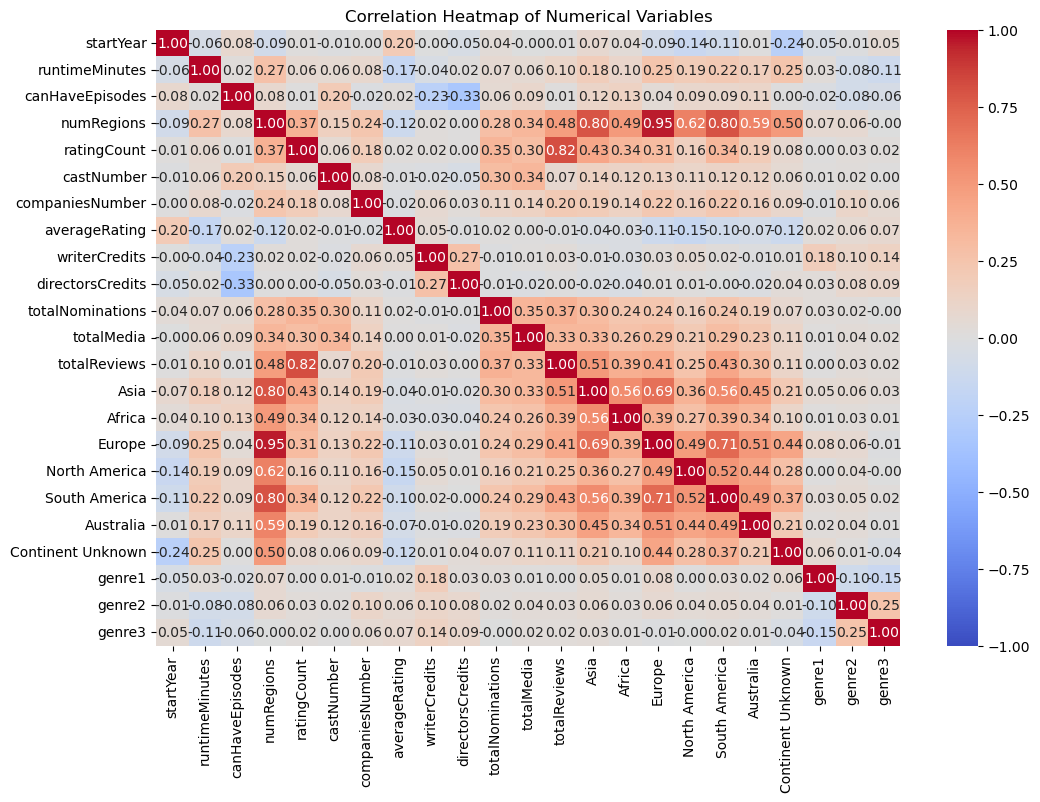

In [8]:
#selecting the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# Compute the correlation matrix
corr = df[numerical_features].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Box Plot and IQR

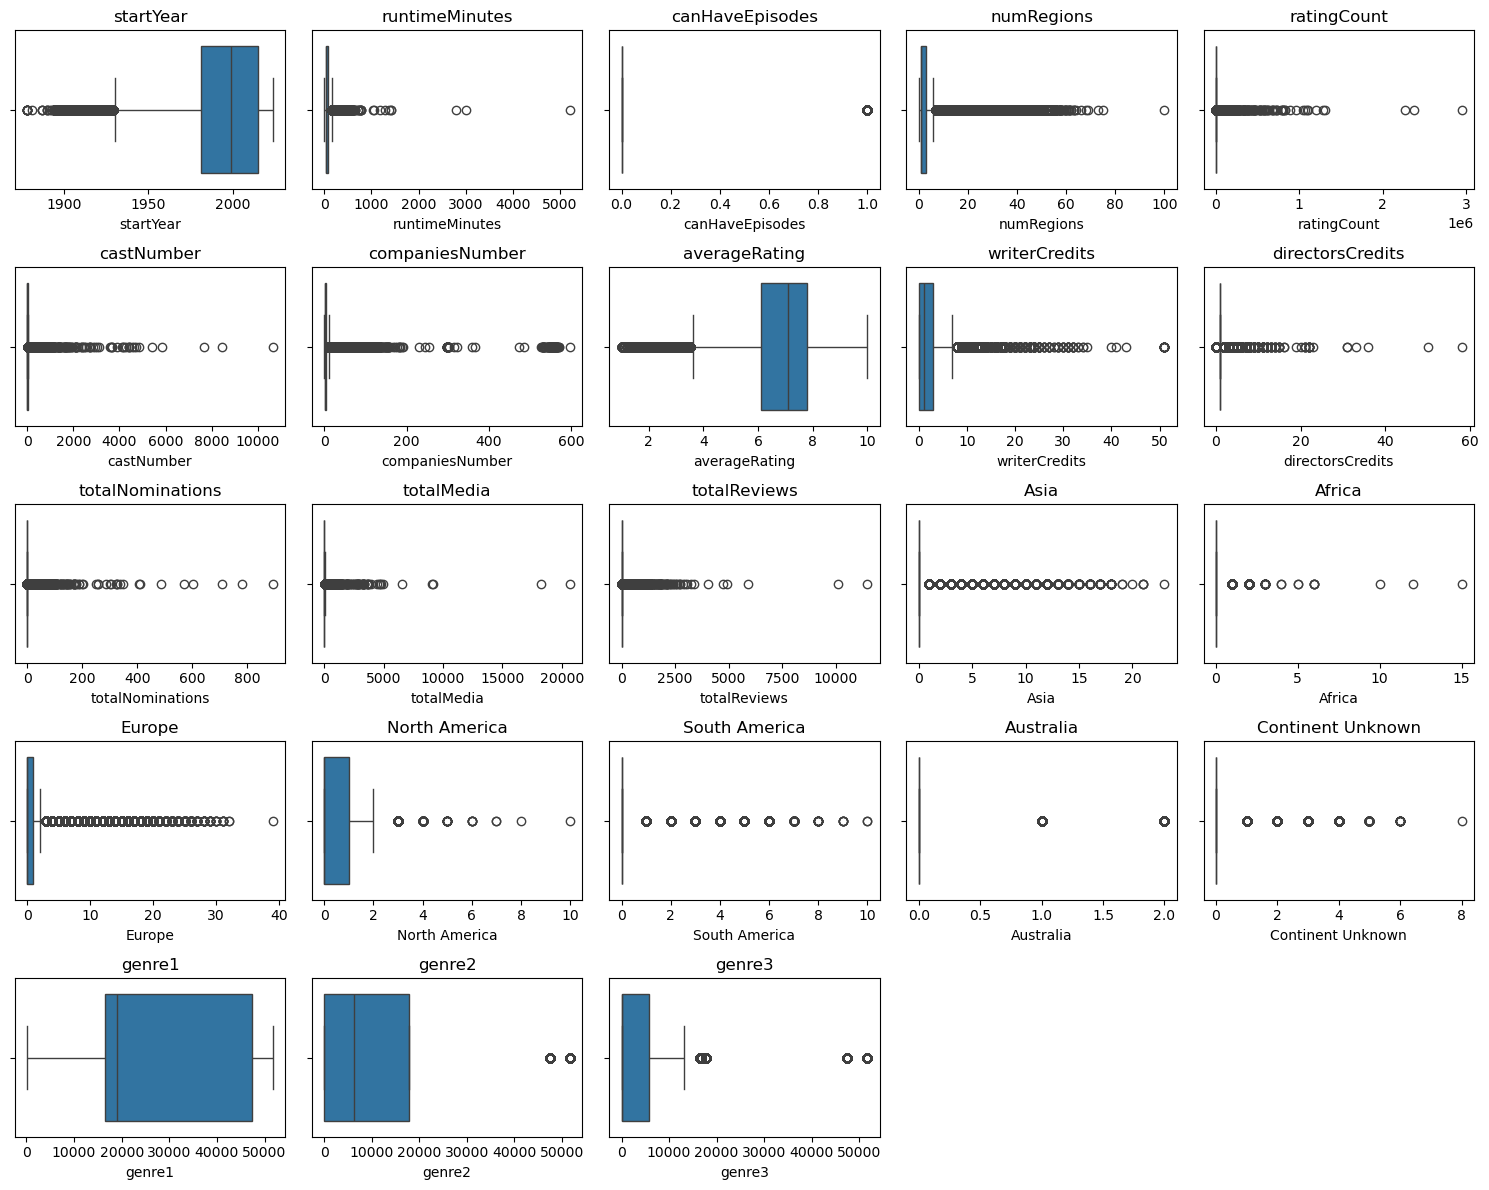

In [10]:
#selecting the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# Set figure size
plt.figure(figsize=(15, 12))

# Plot boxplots for each numerical feature
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)  # Adjust rows/columns if needed
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [11]:
# Compute IQR for each numerical feature
iqr_values = {}
k = 1.5
for col in numerical_features:
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range
    iqr_values[col] = [col, Q1, Q3, IQR, Q1 - k*IQR, Q3 + k*IQR]

# Convert dictionary to DataFrame for better visualization
iqr_df = pd.DataFrame.from_dict(iqr_values, orient = 'index', columns=['Feature', 'Q1','Q3','IQR', 'Min Outlier Value', 'Max Outlier Value']).reset_index(drop=True)

# Print the IQR values
iqr_df

,Feature,Q1,Q3,IQR,Min Outlier Value,Max Outlier Value
0,startYear,1981.0,2015.0,34.0,1930.00,2066.00
1,runtimeMinutes,26.0,81.0,55.0,-56.50,163.50
2,canHaveEpisodes,0.0,0.0,0.0,0.00,0.00
3,numRegions,1.0,3.0,2.0,-2.00,6.00
4,ratingCount,12.0,107.0,95.0,-130.50,249.50
5,castNumber,5.0,21.0,16.0,-19.00,45.00
6,companiesNumber,1.0,5.0,4.0,-5.00,11.00
7,averageRating,6.1,7.8,1.7,3.55,10.35
8,writerCredits,0.0,3.0,3.0,-4.50,7.50
9,directorsCredits,1.0,1.0,0.0,1.00,1.00


In [12]:
# seeing the number of outliers in each feature
for feature in numerical_features:
    min_outlier_value = iqr_df.loc[iqr_df['Feature'] == feature, 'Min Outlier Value'].values[0]
    max_outlier_value = iqr_df.loc[iqr_df['Feature'] == feature, 'Max Outlier Value'].values[0]

    # Count outliers
    outlier = len(df[(df[feature] < min_outlier_value) | (df[feature] > max_outlier_value)])
    
    print(feature, outlier)

startYear 3226
runtimeMinutes 1400
canHaveEpisodes 10827
numRegions 21571
ratingCount 22313
castNumber 8619
companiesNumber 15640
averageRating 2974
writerCredits 4436
directorsCredits 44650
totalNominations 18483
totalMedia 19460
totalReviews 19979
Asia 35478
Africa 3438
Europe 25553
North America 4086
South America 15422
Australia 9903
Continent Unknown 20589
genre1 0
genre2 26355
genre3 20015


In [32]:
# Convert 'Feature' column to index
# iqr_df.index = pd.Index(iqr_df['Feature'])
# iqr_df.drop(columns=['Feature'], inplace=True)

outlier_flags = pd.DataFrame(0, index=df.index, columns=numerical_features)

for col in numerical_features:
    outlier_flags[col] = ((df[col] < iqr_df['Min Outlier Value'][col]) | (df[col] > iqr_df['Max Outlier Value'][col])).astype(int)


In [33]:
outlier_flags['outlier_count'] = outlier_flags.sum(axis=1)
threshold = 12  # or tune this to get 1% of dataset
strong_outliers = outlier_flags[outlier_flags['outlier_count'] >= threshold]
strong_outliers

,startYear,runtimeMinutes,canHaveEpisodes,numRegions,ratingCount,castNumber,companiesNumber,averageRating,writerCredits,directorsCredits,totalNominations,totalMedia,totalReviews,Asia,Africa,Europe,North America,South America,Australia,Continent Unknown,genre1,genre2,genre3,outlier_count
290,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,1,12
519,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,12
535,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,1,12
609,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,12
610,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149252,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,0,1,13
149253,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,15
149282,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,13
149313,0,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,1,12


In [34]:
df['is_outlier'] = 0
df.loc[strong_outliers.index, 'is_outlier'] = 1


In [36]:

# Drop 'is_outlier' from feature set
features = numerical_features

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[numerical_features])

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(features_scaled)

# Create t-SNE DataFrame
tsne_df = pd.DataFrame()
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]
tsne_df['is_outlier'] = df['is_outlier'].values


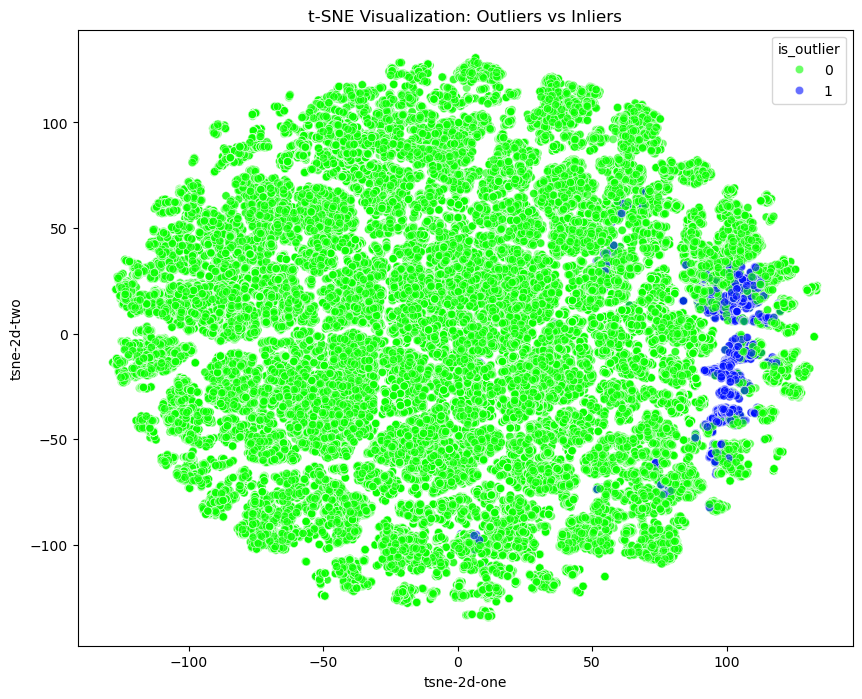

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="is_outlier",
    palette=sns.color_palette("hsv", 2),
    data=tsne_df,
    legend="full",
    alpha=0.6
)
plt.title("t-SNE Visualization: Outliers vs Inliers")
plt.show()

In [38]:
df.to_csv('imdb_iqr_outliers.csv', index=False) # Save the DataFrame to a CSV file

In [ ]:
# number of outliers in each titleType
df.groupby(['titleType', 'is_outlier']).size()

titleType     is_outlier
movie         0             34974
              1              2124
short         0             16368
              1                10
tvEpisode     0             70830
tvMiniSeries  0              1479
              1               140
tvMovie       0              6043
              1                14
tvSeries      0              8395
              1               810
tvShort       0               268
              1                 1
tvSpecial     0              1146
              1                 3
video         0              5138
              1                11
videoGame     0              1776
              1                 1
dtype: int64

In [88]:
# imputing random integer values between the 25th percentile and 75th percentile
for i in range(len(df)):
    if df['runtimeMinutes'][i] == '\\N': 
        type = df['titleType'][i]        
        df.loc[i, 'runtimeMinutes'] = random.randrange(iqr_df_title.loc[iqr_df_title['titleType'] == type, 'Q1'].values[0], iqr_df_title.loc[iqr_df_title['titleType'] == type, 'Q3'].values[0])
        

In [89]:
#changing the runtime to numeric data type
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'])

# HBOS

In [54]:
pip install pyod


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
# checking only for tvEpisode
df_tv = df[df['titleType'] == 'tvEpisode']

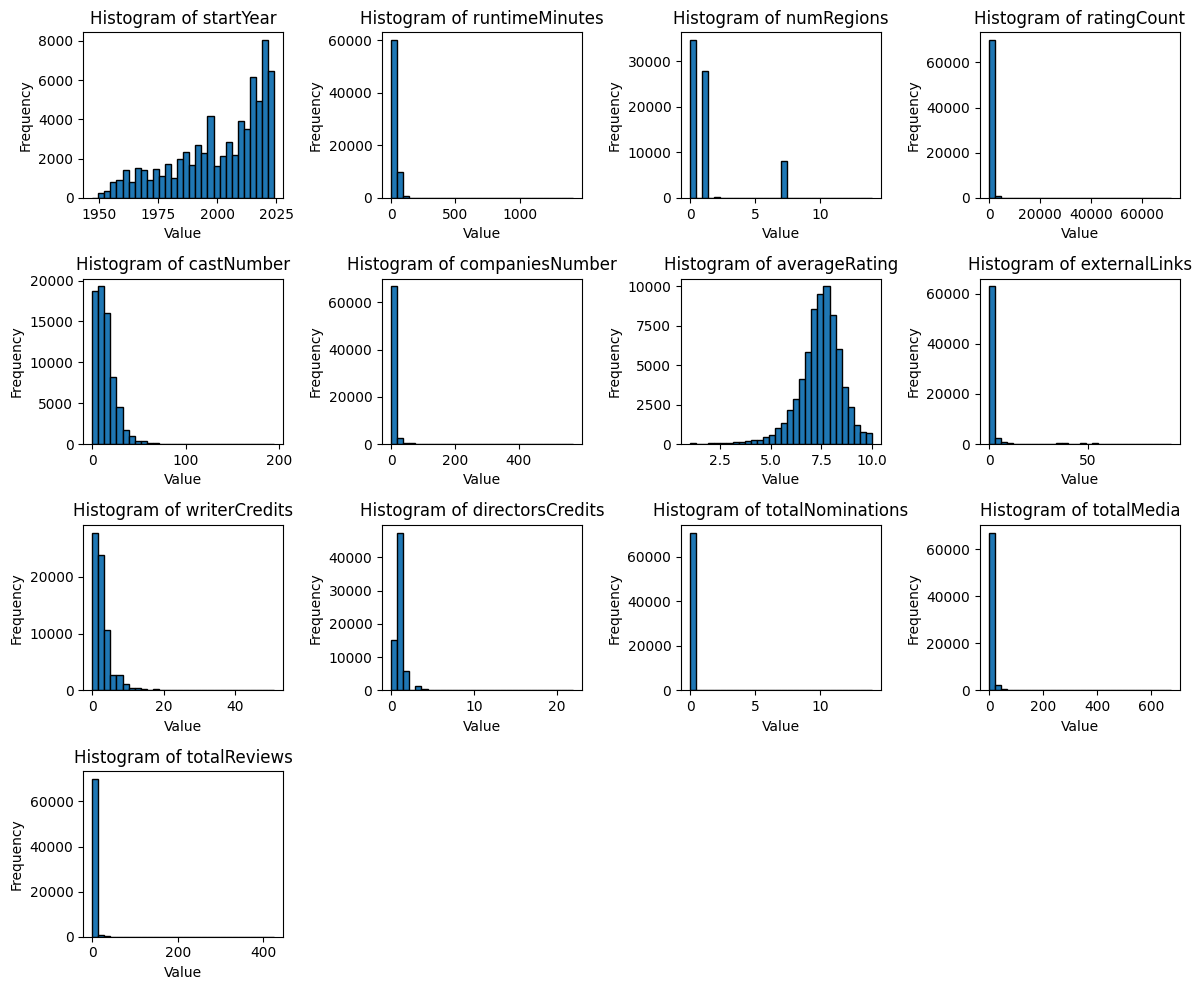

In [91]:
#selecting the numerical features
numerical_features = df_tv.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    plt.hist(df_tv[feature], bins=30, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [94]:
#setting the threshold of the frequency below which the values are outlier
threshold  = 3
outliers = pd.DataFrame()

for feature in numerical_features:
    # Calculate histogram
    hist, bin_edges = np.histogram(df_tv[feature], bins=30)
    
    # Identify bins with frequency below the threshold
    outlier_bins = bin_edges[:-1][hist < threshold]
    print(feature, outlier_bins, end = '\n\n')
    
    if len(outlier_bins) >0:
        # Identify outliers based on these bins
        feature_outliers = df_tv[(df_tv[feature] < min(outlier_bins)) | (df_tv[feature] > max(outlier_bins))]
        outliers = pd.concat([outliers, feature_outliers])

# Drop duplicates since some data points may be outliers in multiple features
outliers = outliers.drop_duplicates()
print('Lenght of df_Tv', len(df_tv))
print("Outliers detected:", len(outliers))


startYear []

runtimeMinutes [ 330.93333333  378.06666667  425.2         472.33333333  519.46666667
  566.6         613.73333333  660.86666667  708.          755.13333333
  802.26666667  849.4         896.53333333  943.66666667  990.8
 1037.93333333 1085.06666667 1132.2        1179.33333333 1226.46666667
 1273.6        1320.73333333 1367.86666667]

numRegions [ 0.46666667  1.4         2.33333333  3.26666667  4.2         5.13333333
  6.06666667  6.53333333  7.46666667  7.93333333  8.4         9.33333333
 10.26666667 10.73333333 11.2        11.66666667 12.13333333 12.6
 13.06666667 13.53333333]

ratingCount [26162.26666667 28540.2        30918.13333333 33296.06666667
 35674.         38051.93333333 42807.8        45185.73333333
 47563.66666667 49941.6        52319.53333333 54697.46666667
 57075.4        59453.33333333 61831.26666667 64209.2
 66587.13333333 68965.06666667]

castNumber [117.  123.5 130.  136.5 143.  149.5 156.  162.5 175.5 182.  188.5]

companiesNumber [133. 152. 171. 190. 

# Depth based Outlier Detection 

In [100]:
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler

#selecting the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Drop rows with missing values (Elliptic Envelope does not handle NaNs)
df_clean = df[numerical_features].dropna()

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Fit Elliptic Envelope (assumes Gaussian distribution)
contamination = 0.01  # Assuming top 1% as outliers
model = EllipticEnvelope(contamination=contamination, support_fraction=1.0)
model.fit(df_scaled)

EllipticEnvelope(contamination=0.01, support_fraction=1.0)

In [103]:
# Predict anomalies (-1 = outlier, 1 = inlier)
df_clean['Anomaly'] = model.predict(df_scaled)

# Split normal and outlier data
df_normal = df_clean[df_clean['Anomaly'] == 1]
df_outliers = df_clean[df_clean['Anomaly'] == -1]

# Extract outliers
outliers = df_clean[df_clean['Anomaly'] == -1]

# Print results
print(f"Total data points: {len(df_clean)}")
print(f"Detected anomalies: {len(outliers)}")

Total data points: 149531
Detected anomalies: 1496


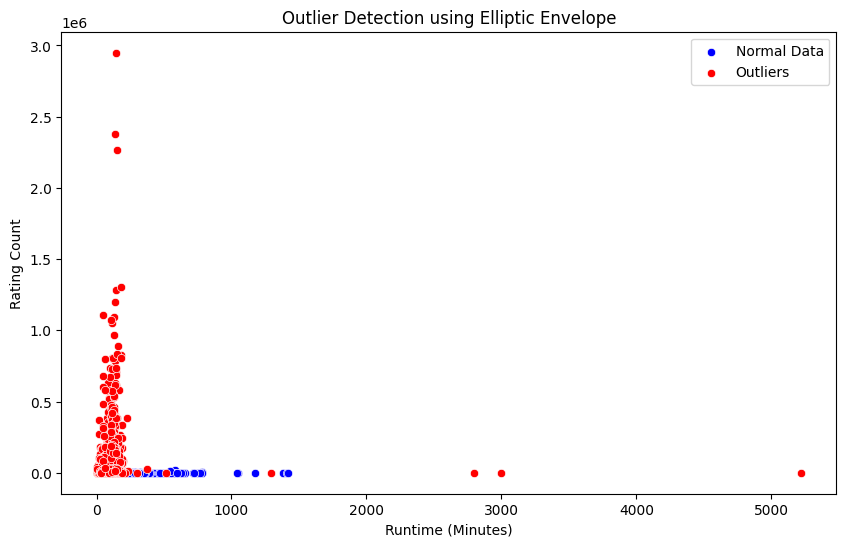

In [104]:
# 🔷 2D Scatter Plot (runtimeMinutes vs ratingCount)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_normal['runtimeMinutes'], y=df_normal['ratingCount'], color='blue', label="Normal Data")
sns.scatterplot(x=df_outliers['runtimeMinutes'], y=df_outliers['ratingCount'], color='red', label="Outliers")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Rating Count")
plt.title("Outlier Detection using Elliptic Envelope")
plt.legend()

In [ ]:
# Distance Based KNN

In [105]:
from sklearn.neighbors import NearestNeighbors

# Fit KNN model to find distances to the k-nearest neighbors
k = 5  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(df_scaled)

# Compute distances to the k-th nearest neighbor
distances, indices = nbrs.kneighbors(df_scaled)
df_clean['KNN_Distance'] = distances[:, k-1]  # Distance to the k-th nearest neighbor

# Set a threshold (Top 1% highest distances as anomalies)
threshold = np.percentile(df_clean['KNN_Distance'], 99)
df_clean['Anomaly'] = df_clean['KNN_Distance'] > threshold

In [106]:
# Extract outliers
df_outliers = df_clean[df_clean['Anomaly']]

# 🔷 Print results
print(f"Total data points: {len(df_clean)}")
print(f"Detected anomalies: {len(df_outliers)}")

Total data points: 149531
Detected anomalies: 1496


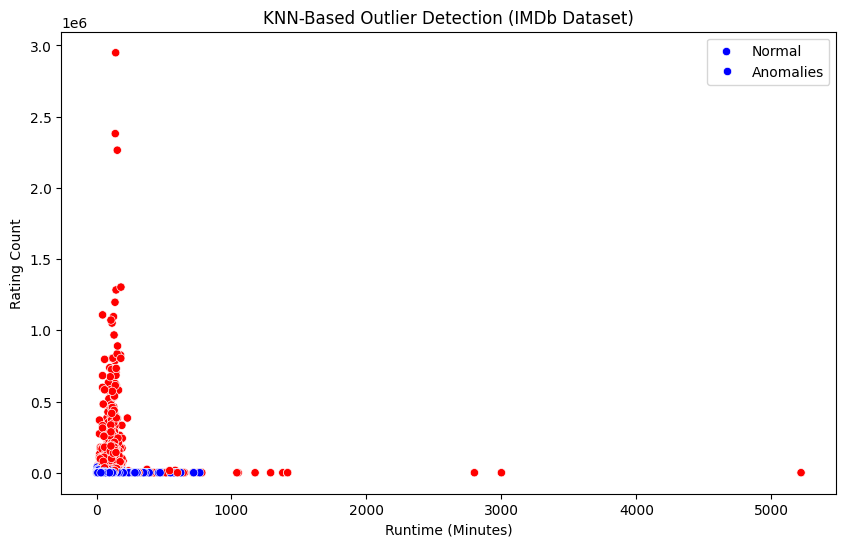

In [107]:
# 🔷 2D Scatter Plot (runtimeMinutes vs ratingCount)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean['runtimeMinutes'], y=df_clean['ratingCount'], 
                hue=df_clean['Anomaly'], palette={False: 'blue', True: 'red'})
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Rating Count")
plt.title("KNN-Based Outlier Detection (IMDb Dataset)")
plt.legend(["Normal", "Anomalies"])
plt.show()

# Density based Outlier Detection LOF

In [110]:
from sklearn.neighbors import LocalOutlierFactor

# Fit Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.01)  # 1% anomalies
df_clean['LOF_Score'] = lof.fit_predict(df_scaled)  # -1 = outlier, 1 = inlier

# Extract outliers
df_outliers = df_clean[df_clean['LOF_Score'] == -1]

# 🔷 Print results
print(f"Total data points: {len(df_clean)}")
print(f"Detected anomalies: {len(df_outliers)}")

Total data points: 149531
Detected anomalies: 1496


In [111]:
np.unique(df_clean['LOF_Score'], return_counts=True)

(array([-1,  1]), array([  1496, 148035], dtype=int64))

In [117]:
lof_scores = lof.negative_outlier_factor_
lof_scores

array([-1.21549506, -1.39860113, -1.32194705, ..., -1.03320337,
       -1.04985616, -1.03413036])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

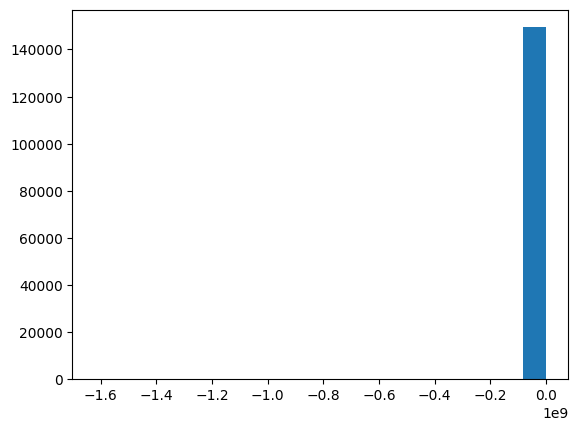

In [115]:
plt.hist(lof.negative_outlier_factor_, bins=20)
plt.axvline(np.min(lof.negative_outlier_factor_[np.where(outliers==1)]), c='k')
plt.show()

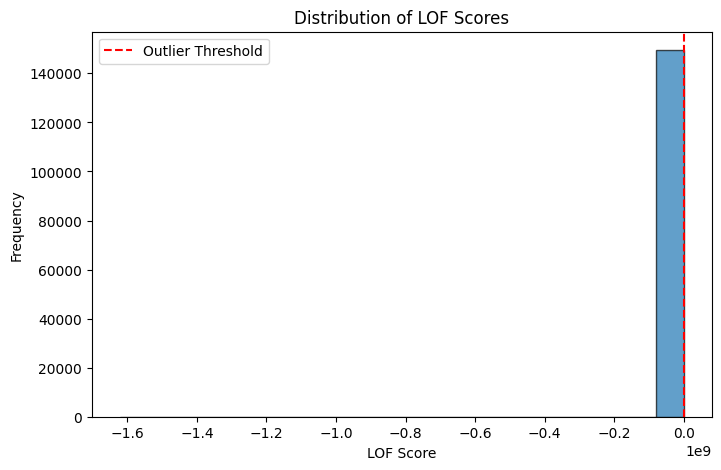

In [118]:
# Plot histogram of LOF scores
plt.figure(figsize=(8, 5))
plt.hist(lof_scores, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("LOF Score")
plt.ylabel("Frequency")
plt.title("Distribution of LOF Scores")

# Find threshold value for outliers
outlier_threshold = np.percentile(lof_scores, 1)  # Top 1% as outliers
plt.axvline(outlier_threshold, color='red', linestyle='dashed', label="Outlier Threshold")

plt.legend()
plt.show()

In [119]:
from pyod.models.lof import LOF

In [120]:
clf = LOF()
clf.fit(df_scaled)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [122]:
outliers = clf.predict(df_scaled)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([136447,  13084], dtype=int64))

In [123]:
clf_scores = clf.negative_outlier_factor_

AttributeError: 'LOF' object has no attribute 'negative_outlier_factor_'

In [ ]:
# Plot histogram of LOF scores
plt.figure(figsize=(8, 5))
plt.hist(lof_scores, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("LOF Score")
plt.ylabel("Frequency")
plt.title("Distribution of LOF pymod Scores")

# Find threshold value for outliers
outlier_threshold = np.percentile(lof_scores, 1)  # Top 1% as outliers
plt.axvline(outlier_threshold, color='red', linestyle='dashed', label="Outlier Threshold")

plt.legend()
plt.show()

# COF

In [124]:
from pyod.models.cof import COF

In [126]:
clf = COF()
clf.fit(df_scaled)

MemoryError: Unable to allocate 167. GiB for an array with shape (149531, 149531) and data type float64

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

# DBSCAN

In [127]:
from sklearn.cluster import DBSCAN

In [128]:
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(df_scaled)

MemoryError: 